In [1]:
%load_ext autoreload
%autoreload 2

<Axes: title={'center': 'US 10Y Treasury Yield'}, xlabel='DATE'>

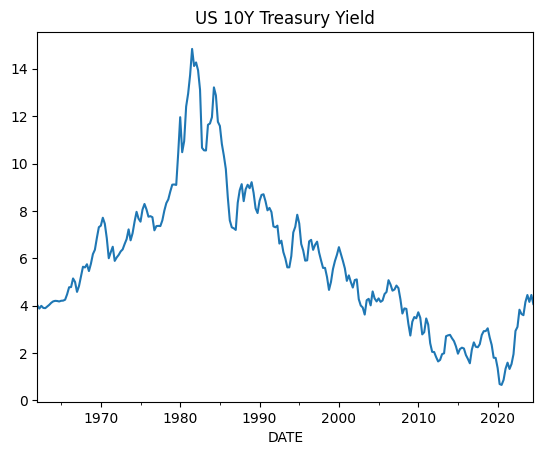

In [2]:
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn as sk
from sklearn.metrics import root_mean_squared_error
import utils

df = utils.load_data()

X_train, y_train, X_test, y_test = utils.train_test_split(df, label_col="US_TB_YIELD_10YRS")
y_full = df["US_TB_YIELD_10YRS"]
y_full.plot(title="US 10Y Treasury Yield")

## Exponential Smoothing

In [3]:
def evaluate_ses():
    """Plot and evaluate the model on the full dataset.
    At each step, the model is retrained on the full dataset up to that point.
    """
    fcast = pd.Series()
    for i in range(2, len(y_full)):
        fit1 = sm.tsa.SimpleExpSmoothing(y_full.iloc[:i], initialization_method="estimated").fit(optimized=True)
        fcast = pd.concat([fcast, fit1.forecast(1)])

    utils.plot_forecast(y_full[2:], fcast)
    return sm.tools.eval_measures.rmse(y_full.iloc[2:], fcast)


evaluate_ses()

/var/folders/xn/3599xwv92dv0b2nzybpwbzlr0000gn/T/ipykernel_60722/3534598893.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fcast = pd.concat([fcast, fit1.forecast(1)])


0.4685281668913827

## ARIMA

In [6]:
def evaluate_hw():
    """Plot and evaluate the model on the full dataset.
    At each step, the model is retrained on the full dataset up to that point.
    """
    fcast = pd.Series()
    for i in range(2, len(y_full)):
        fit1 = sm.tsa.Holt(y_full.iloc[:i], initialization_method="estimated").fit(optimized=True)
        fcast = pd.concat([fcast, fit1.forecast(1)])

    utils.plot_forecast(y_full[2:], fcast)
    return sm.tools.eval_measures.rmse(y_full.iloc[2:], fcast)

evaluate_hw()

/var/folders/xn/3599xwv92dv0b2nzybpwbzlr0000gn/T/ipykernel_60722/4023734664.py:8: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



0.4881829441791463

# -----
# The series are differenced and log-transformed as suggested in the literature.


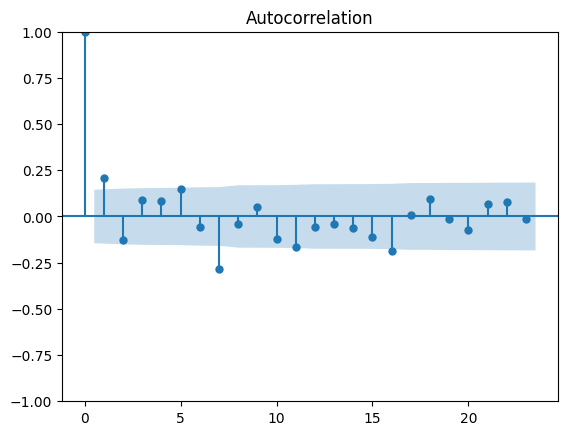

In [14]:
y_train_diff = y_train.diff().dropna()
sm.graphics.tsa.plot_acf(y_train_diff)
plt.show()

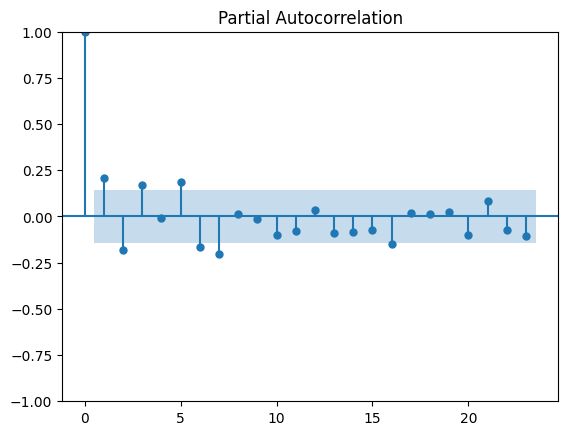

In [15]:
sm.graphics.tsa.plot_pacf(y_train_diff)
plt.show()

In [16]:
sm.tsa.SARIMAX(y_train, order=(1, 1, 1)).fit().summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36425D+00    |proj g|=  6.97232D-02

At iterate    5    f=  1.35605D+00    |proj g|=  1.01852D-02

At iterate   10    f=  1.34164D+00    |proj g|=  6.49786D-02

At iterate   15    f=  1.34036D+00    |proj g|=  1.51283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   6.433D-07   1.340D+00
  F =   1.3403558623950353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   FFED   No. Observations:                  184
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -246.625
Date:                Wed, 13 Nov 2024   AIC                            499.251
Time:                        13:09:42   BIC                            508.879
Sample:                    03-31-1970   HQIC                           503.154
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4134      0.101     -4.111      0.000      -0.610      -0.216
ma.L1          0.7283      0.068     10.646      0.000       0.594       0.862
sigma2         0.8661      0.034     25.255      0.000       0.799       0.933
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1559.91
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""